In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Loading the dataset into a pandas DataFrame

data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

data

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [3]:
# dropping NaN values

data.dropna(subset=['Price'], inplace = True)

In [4]:
# Displaying the first few rows of the dataset

data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [5]:
# Checking the number of rows and columns in the dataset

data.shape

(920, 8)

In [6]:
# Displaying information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    object 
 3   Price       920 non-null    float64
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 64.7+ KB


In [7]:
# Generating descriptive statistics for numerical columns

data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,920.000000,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,462.625000,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,266.924298,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.000000,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,462.500000,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,693.250000,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,924.000000,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [8]:
# Checking for missing values in the dataset

data.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [9]:
# Checking for duplicate rows in the dataset

data.duplicated().sum()

0

In [10]:
data.columns

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [11]:

pred_data = data.copy()

In [12]:
# Dropping unnecessary columns

pred_data.drop(["Unnamed: 0", "Address", "Zip"], axis = 1, inplace = True)

In [13]:
pred_data

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


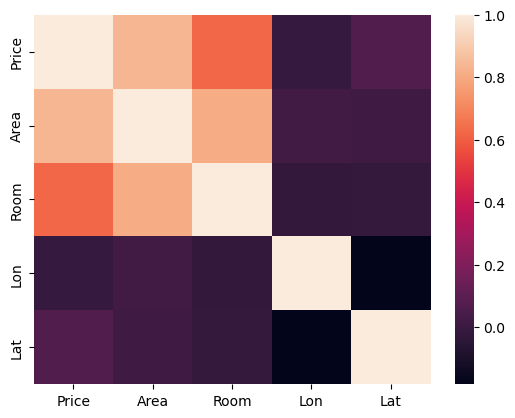

In [14]:
# Plotting a heatmap to visualize the correlation matrix of numerical features

sns.heatmap(pred_data.corr())
plt.show()

In [15]:
# defining the X (independent variable)

X = pred_data.drop(["Price"], axis = 1)

X

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [16]:
# defining the y (target variable)

y = pred_data["Price"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [18]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)


LinearRegression()

In [19]:
y_predict = regressor.predict(X_test)

y_predict

array([2013468.14460973,  684972.66040585,  176453.43098948,
        519966.40517367,  283962.25459678,  324346.19271359,
        563874.73364505,  239287.88586383,  621857.06945575,
        652798.34349954, 1120171.96520588,  744730.75605673,
        540138.10418984,  477506.80712149,  508391.21778358,
        708117.78711694,  724017.32563961,  818057.5754934 ,
       1110033.02959216,  198939.53613716,  706849.51966584,
        973844.08061118,  302490.50734332,  376293.05962531,
        510805.46848351,  477478.54830648,  613569.71193568,
        213851.6216478 ,  364837.49484815,  679325.84852116,
       1160595.50187346,  315345.86391573,  740899.85654795,
        470557.13576844,  245593.85975935,  538115.50181716,
        684947.31849225,  407592.58650561,  379589.76466902,
        354204.02121166,  879321.81397965, 2685324.82384799,
        485895.301712  ,  916035.3948562 ,  408311.7815811 ,
        571637.45089714,  222950.79193743,  444667.98875115,
        369977.71480022,

In [20]:
regressor.coef_

array([   8880.15473346,  -42457.77723685, -329073.63475711,
        730743.12857545])

In [21]:
regressor.intercept_

-36729257.39557158

In [22]:
r2_score (y_test, y_predict)

0.7998106641653246